In [37]:
# préparation des données pour l'entrainement de 1992 - 2020
import import_ipynb
import utils
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split


# création des dataframes pour l'intégralité des données
data_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")
data_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")
data_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")
data_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")
data_climat = utils.generate_df_from_files("./", "climate_cleaned")

data_climat = np.array(data_climat)
data_climat = pd.DataFrame(data_climat.squeeze())
X_list = []

for annee in range(11, 19):
        
    data_pop_slice = data_pop[annee].iloc[:, :]
    data_fertility_slice = data_fertility[annee].iloc[:, 1:]
    data_child_slice = data_child[annee].iloc[:, 1:]
    data_capita_slice = data_capita[annee].iloc[:, 1:]
    data_climat_slice = data_climat.iloc[:, 1:]
    
    concatenated_data = np.concatenate((
        data_pop_slice, 
        data_fertility_slice, 
        data_child_slice, 
        data_capita_slice,
        data_climat_slice
    ), axis=1)

    X_list.append(concatenated_data)

X = np.vstack(X_list)

In [38]:
# récupération des labels
import pandas as pd
df_delegations = pd.read_csv("./second_part_countries_cleaned_normalized.csv")

labels_list = []
for i in range(len(df_delegations)):
    label = df_delegations.iloc[i, :-1]
    labels_list.append(label)

y = pd.concat(labels_list, axis=0, ignore_index=True)

In [39]:
country_names = X[:, 0]
X = X[:, 1:]
# conversion des données en float32
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# séparation des données en train et test
X_train, X_test, y_train, y_test, country_train, country_test = train_test_split(
    X, y, country_names, test_size=0.2, random_state=42)

In [40]:
len(y)

1144

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)


c:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0396 - mae: 0.1378 - val_loss: 0.0276 - val_mae: 0.0895
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - mae: 0.0930 - val_loss: 0.0240 - val_mae: 0.0891
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mae: 0.0791 - val_loss: 0.0199 - val_mae: 0.0860
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - mae: 0.0735 - val_loss: 0.0181 - val_mae: 0.0679
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 - mae: 0.0683 - val_loss: 0.0162 - val_mae: 0.0666
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 - mae: 0.0648 - val_loss: 0.0151 - val_mae: 0.0635
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - mae: 0.0586 - val_loss: 0.0135 - val_mae: 0.0646
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - mae: 0.0626 - val_loss: 0.0131 - val_mae: 0.0670
Epoch 9/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.01

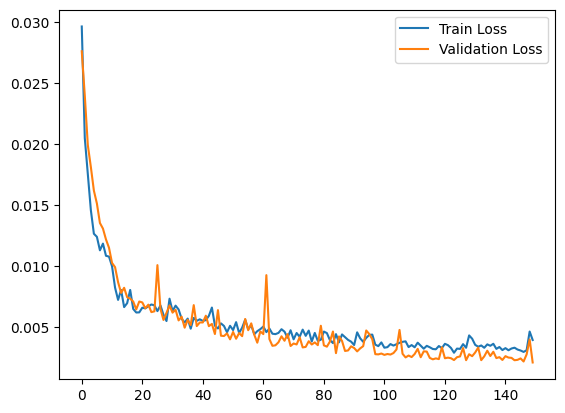

In [42]:
# plot de history pour voir l'évolution de la loss et de la mae
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Coefficient de détermination R^2 : 0.87


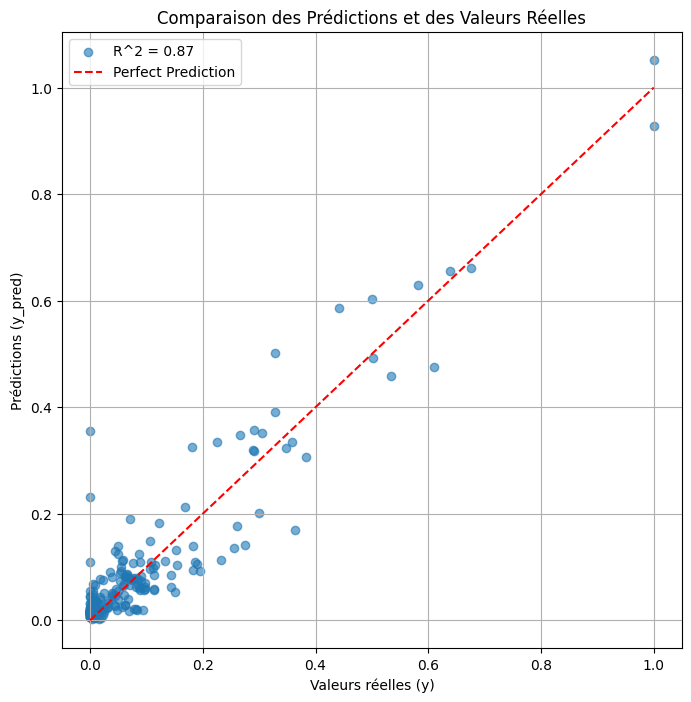

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Effectuer les prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le R^2
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination R^2 : {r2:.2f}")

# Création du graphique
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, label=f"R^2 = {r2:.2f}")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction")
plt.xlabel("Valeurs réelles (y)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Comparaison des Prédictions et des Valeurs Réelles")
plt.legend()
plt.grid(True)
plt.show()
